### Table of Content

[1. Gradient Boosting for Regression](#g1) <br>

[2. Gradient Boosting for Classification](#g2) <br>


## <a id='g1'></a> 1. Gradient Boosting for Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import tree

# The small dataset
data = np.array([[5,2.28],
                 [4,1.5],
                 [2,0.88]])
col_names = ['num_bedrooms', 'sale_price_million']
print(pd.DataFrame(data, columns=col_names), "\n")

X = data[:, 0].reshape(-1, 1) # all rows, 1st column
y = data[:, 1] # all rows, 2nd column

   num_bedrooms  sale_price_million
0           5.0                2.28
1           4.0                1.50
2           2.0                0.88 



In [2]:
gbr = GradientBoostingRegressor(n_estimators=2, 
                                criterion='squared_error', 
                                learning_rate=0.5, 
                                max_depth=1)
# n_estimators: The number of boosting stages (i.e., trees)
# criterion: The function to measure the quality of a split
# learning_rate: The alpha value
# max_depth: the maximum depth of each tree

gbr.fit(X, y)

GradientBoostingRegressor(criterion='squared_error', learning_rate=0.5,
                          max_depth=1, n_estimators=2)

In [3]:
print("training dataset, predicted value:\n",
      np.round( gbr.predict(X), decimals=3 ).reshape(-1,1))
# same as our manually calculated values

training dataset, predicted value:
 [[2.04 ]
 [1.495]
 [1.126]]


First Decision Tree:


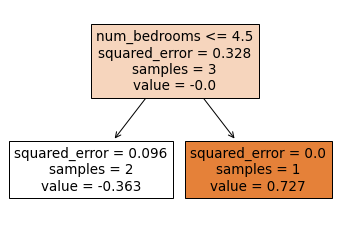

In [4]:
_ = tree.plot_tree(gbr.estimators_[0][0], 
                   feature_names=['num_bedrooms'], 
                   filled=True)
print("First Decision Tree:")

Second Decision Tree:


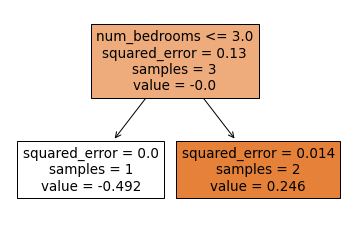

In [5]:
_ = tree.plot_tree(gbr.estimators_[1][0], 
                   feature_names=['num_bedrooms'], 
                   filled=True)
print("Second Decision Tree:")

In [6]:
# New house with 3 bedrooms, the predicted price 
# by the model will be:
np.round( gbr.predict(np.array([[3]])), decimals=3 )

array([1.126])

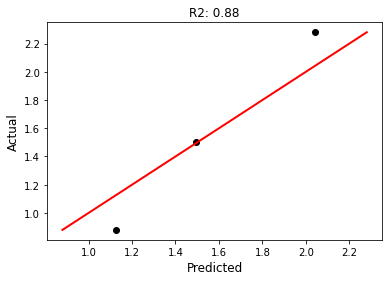

In [7]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

r2 = np.round(r2_score(y, gbr.predict(X)), 2)

fig, ax = plt.subplots()
ax.scatter(gbr.predict(X), y, c='k')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r', lw=2)
ax.set_xlabel('Predicted', fontsize=12)
ax.set_ylabel('Actual', fontsize=12)

ax.set_title('R2: ' + str(r2))
plt.show()

## <a id='g2'></a> 2. Gradient Boosting for Classification

In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree

# The small dataset
data = np.array([[5,1],
                 [4,0],
                 [2,1]])
col_names = ['num_bedrooms', 'is_easy_sell']
print(pd.DataFrame(data, columns=col_names), "\n")

X = data[:, 0].reshape(-1, 1) # all rows, 1st column
y = data[:, 1] # all rows, 2nd column

   num_bedrooms  is_easy_sell
0             5             1
1             4             0
2             2             1 



In [9]:
gbc = GradientBoostingClassifier(n_estimators=2, 
                                 criterion="squared_error", 
                                 learning_rate=0.5, 
                                 max_depth=1)
# n_estimators: The number of boosting stages (i.e., trees)
# criterion: The function to measure the quality of a split
# learning_rate: The alpha value
# max_depth: the maximum depth of each tree

gbc.fit(X, y)

GradientBoostingClassifier(criterion='squared_error', learning_rate=0.5,
                           max_depth=1, n_estimators=2)

In [10]:
print("training dataset, probabilities of belonging to class 1:\n",
      np.round(gbc.predict_proba(X)[:,1].reshape(-1,1), 4))
# same as our manually calculated probabilities

training dataset, probabilities of belonging to class 1:
 [[0.7653]
 [0.4579]
 [0.7224]]


In [11]:
print("training dataset, predicted class:\n",
      gbc.predict(X).reshape(-1,1))
# same as our manually calculated classes

training dataset, predicted class:
 [[1]
 [0]
 [1]]


First Decision Tree:


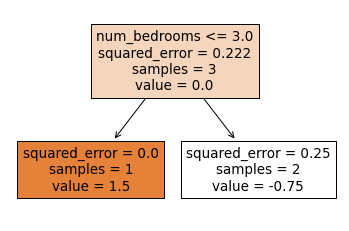

In [12]:
_ = tree.plot_tree(gbc.estimators_[0][0], 
                   feature_names=['num_bedrooms'], 
                   filled=True)
print("First Decision Tree:")

Second Decision Tree:


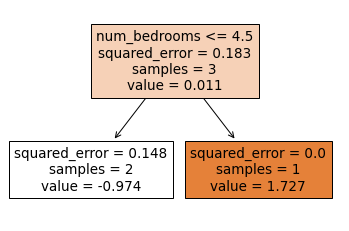

In [13]:
_ = tree.plot_tree(gbc.estimators_[1][0], 
                   feature_names=['num_bedrooms'], 
                   filled=True)
print("Second Decision Tree:")

In [14]:
# New house with 3 bedrooms, the predicted probability 
# of belonging to class 1 by the model will be:
np.round( gbc.predict_proba(np.array([[3]]))[:,1], 4 )

array([0.7224])

In [15]:
# New house with 3 bedrooms, the predicted class 
# by the model will be:
gbc.predict(np.array([[3]]))

array([1])